In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [93]:
df1['location'][3]

'Lingadheeranahalli'

In [3]:
g = df1.groupby('area_type').agg('count')
g

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [5]:
df2 = df1.drop(['area_type','society','availability','balcony'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3= df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3.head()

<ipython-input-12-382e5bd37bb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [9]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [6]:
def convert(x):
    a = x.split("-")
    if len(a)==2:
        return ((float(a[0])+float(a[1])))/2
    try:
        return float(x)
    except:
        return None

In [28]:
convert('2100-2133')

2116.5

In [13]:
df4 = df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert)
df4.head(7)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4


In [14]:
df5 = df4.copy()
df5['price_per_sqft']=df5['price']*1000000/df5['total_sqft']
df5.head(10)



,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,362745.098039


In [16]:
df5.location = df5.location.apply(lambda x: x.strip())
loc_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [17]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]
loc_stats_less_than_10


location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [18]:
df5['location'] = df5['location'].apply(lambda x:'other' if x in loc_stats_less_than_10   else x)
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66898.349262
13316,other,4 BHK,3600.0,5.0,400.00,4,111111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52585.451358
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104073.363190


In [19]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [20]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

In [63]:
df6.drop('O',axis =  'columns',inplace = True)
df6

C:\Users\Prashant\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66898.349262
13316,other,4 BHK,3600.0,5.0,400.00,4,111111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52585.451358
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104073.363190


In [21]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m =np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        red_df = subdf[(subdf.price_per_sqft >(m-st))& (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out,red_df],ignore_index=True)
    return df_out

df7 = remove_outliers(df6)
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,150175.438596
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,119018.404908
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,125333.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,108333.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,119838.056680


In [22]:
df7.shape

(10241, 7)

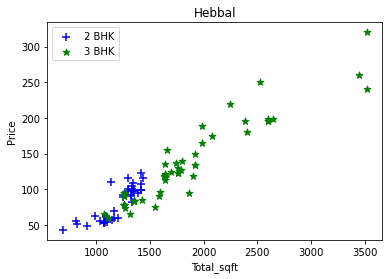

In [25]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk ==2)]
    bhk3 = df[(df.location==location) & (df.bhk ==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',marker = '+',label = '2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color = 'green',marker = '*',label = '3 BHK',s=50)
    plt.xlabel('Total_sqft')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,'Hebbal')

In [52]:
df7[df7.location=='1st Block Jayanagar']


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,150175.438596
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,119018.404908
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,125333.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,108333.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,119838.056680
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,150181.818182
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,150204.081633


In [67]:

for location_df in df7.groupby('location'):
    print(location)
    print(location_df)

other
('1st Block Jayanagar',               location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4   150175.438596
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3   119018.404908
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3   125333.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3   108333.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2   119838.056680
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4   150181.818182
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4   150204.081633)
other
('1st Phase JP Nagar',               location       size  total_sqft  bath  price  bhk  \
7   1st Phase JP Nagar      4 BHK      2825.0   4.0  250.0    4   
8   1st Phase JP Nagar      3 BHK      1875.0   3.0  167.0    3   
9   1st Phase JP Nagar  5 Bedroom      1500.0   5.0   85.0    5   
10  1st Phase JP Nagar      3 BHK      2065.0   4.0  210.0    3 

('Bellandur',        location   size  total_sqft  bath  price  bhk  price_per_sqft
1088  Bellandur  3 BHK      1767.0   3.0  103.0    3    58290.888512
1089  Bellandur  2 BHK      1205.0   2.0   66.0    2    54771.784232
1090  Bellandur  2 BHK      1250.0   2.0   76.0    2    60800.000000
1091  Bellandur  2 BHK      1000.0   2.0   50.0    2    50000.000000
1092  Bellandur  2 BHK      1281.0   2.0   74.0    2    57767.369243
...         ...    ...         ...   ...    ...  ...             ...
1171  Bellandur  2 BHK      1260.0   2.0   83.5    2    66269.841270
1172  Bellandur  3 BHK      1535.0   3.0   90.0    3    58631.921824
1173  Bellandur  2 BHK      1047.0   2.0   75.0    2    71633.237822
1174  Bellandur  2 BHK      1096.0   2.0   40.0    2    36496.350365
1175  Bellandur  2 BHK      1262.0   2.0   47.0    2    37242.472266

[88 rows x 7 columns])
other
('Benson Town',          location       size  total_sqft  bath  price  bhk  price_per_sqft
1176  Benson Town      3 BHK     3200

('Electronics City Phase 1',                       location   size  total_sqft  bath  price  bhk  \
2294  Electronics City Phase 1  2 BHK     1070.00   2.0  45.50    2   
2295  Electronics City Phase 1  3 BHK     1475.00   3.0  78.29    3   
2296  Electronics City Phase 1  3 BHK     1490.00   3.0  78.80    3   
2297  Electronics City Phase 1  2 BHK     1113.27   2.0  53.00    2   
2298  Electronics City Phase 1  3 BHK     1490.00   3.0  84.00    3   
2299  Electronics City Phase 1  2 BHK     1175.00   2.0  51.47    2   
2300  Electronics City Phase 1  2 BHK     1160.00   2.0  52.00    2   
2301  Electronics City Phase 1  2 BHK      920.00   2.0  33.00    2   
2302  Electronics City Phase 1  3 BHK     1750.00   3.0  84.00    3   
2303  Electronics City Phase 1  3 BHK     1350.00   3.0  55.00    3   
2304  Electronics City Phase 1  2 BHK      940.00   2.0  40.00    2   
2305  Electronics City Phase 1  2 BHK     1015.00   2.0  56.00    2   
2306  Electronics City Phase 1  3 BHK     1595.0

('Indira Nagar',           location       size  total_sqft  bath  price  bhk  price_per_sqft
3500  Indira Nagar  4 Bedroom      2200.0   4.0  200.0    4    90909.090909
3501  Indira Nagar      2 BHK      1200.0   2.0   93.0    2    77500.000000
3502  Indira Nagar      2 BHK      1128.0   2.0  105.0    2    93085.106383
3503  Indira Nagar      3 BHK      2800.0   3.0  330.0    3   117857.142857
3504  Indira Nagar      3 BHK      1650.0   3.0  200.0    3   121212.121212
3505  Indira Nagar      3 BHK      1875.0   3.0  180.0    3    96000.000000
3506  Indira Nagar      2 BHK      1210.0   2.0  102.0    2    84297.520661
3507  Indira Nagar      2 BHK      1224.0   2.0  105.0    2    85784.313725
3508  Indira Nagar      3 BHK      2070.0   3.0  225.0    3   108695.652174
3509  Indira Nagar  1 Bedroom       500.0   1.0   70.0    1   140000.000000
3510  Indira Nagar      2 BHK      1400.0   2.0  168.0    2   120000.000000
3511  Indira Nagar  4 Bedroom      2400.0   4.0  525.0    4   218750.00

[149 rows x 7 columns])
other
('Margondanahalli',              location       size  total_sqft  bath  price  bhk  price_per_sqft
5093  Margondanahalli  2 Bedroom      1090.0   2.0  58.00    2    53211.009174
5094  Margondanahalli  2 Bedroom      1200.0   2.0  58.50    2    48750.000000
5095  Margondanahalli  2 Bedroom      1200.0   2.0  67.00    2    55833.333333
5096  Margondanahalli  3 Bedroom      1200.0   2.0  65.00    3    54166.666667
5097  Margondanahalli  2 Bedroom      1000.0   2.0  57.00    2    57000.000000
5098  Margondanahalli  3 Bedroom      1625.0   3.0  80.00    3    49230.769231
5099  Margondanahalli  2 Bedroom       600.0   2.0  35.00    2    58333.333333
5100  Margondanahalli  2 Bedroom      1200.0   2.0  69.00    2    57500.000000
5101  Margondanahalli  2 Bedroom       900.0   2.0  49.00    2    54444.444444
5102  Margondanahalli  2 Bedroom      1140.0   2.0  60.00    2    52631.578947
5103  Margondanahalli  2 Bedroom      1100.0   2.0  55.00    2    50000.000000
51

6397  Shampura  3 BHK      1700.0   3.0   75.0    3    44117.647059)
other
('Shivaji Nagar',            location       size  total_sqft  bath  price  bhk  price_per_sqft
6398  Shivaji Nagar      2 BHK       850.0   2.0   55.0    2    64705.882353
6399  Shivaji Nagar      2 BHK      1554.0   3.0  130.0    2    83655.083655
6400  Shivaji Nagar  1 Bedroom      3820.0   1.0  306.0    1    80104.712042
6401  Shivaji Nagar      2 BHK       703.0   2.0   49.5    2    70412.517781
6402  Shivaji Nagar      3 BHK      1460.0   2.0   90.0    3    61643.835616
6403  Shivaji Nagar      2 BHK       600.0   1.0   65.0    2   108333.333333)
other
('Singasandra',          location       size  total_sqft  bath  price  bhk  price_per_sqft
6404  Singasandra      3 BHK      1440.0   2.0   65.0    3    45138.888889
6405  Singasandra      2 BHK      1030.0   2.0   55.0    2    53398.058252
6406  Singasandra  4 Bedroom      3850.0   6.0  195.0    4    50649.350649
6407  Singasandra      2 BHK      1100.0   2.

In [58]:
for bhk,bhk_df in df7.groupby('bhk'):
    print(bhk)
    print(bhk_df)

1
                 location       size  total_sqft  bath  price  bhk  \
16     1st Phase JP Nagar      1 BHK       840.0   2.0   50.0    1   
56     5th Phase JP Nagar      1 BHK       600.0   1.0   30.0    1   
61     5th Phase JP Nagar      1 BHK       552.0   1.0   23.5    1   
182    7th Phase JP Nagar      1 BHK       750.0   1.0   47.0    1   
184    7th Phase JP Nagar  1 Bedroom      1000.0   1.0   60.0    1   
...                   ...        ...         ...   ...    ...  ...   
10176               other      1 BHK       450.0   1.0   20.0    1   
10181               other      1 BHK       540.0   1.0   22.5    1   
10219               other      1 BHK       530.0   1.0   18.0    1   
10233               other      1 BHK      1800.0   1.0  200.0    1   
10237               other  1 Bedroom       812.0   1.0   26.0    1   

       price_per_sqft  
16       59523.809524  
56       50000.000000  
61       42572.463768  
182      62666.666667  
184      60000.000000  
...          

In [61]:

    
    
for location,location_df in df7.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in df7.groupby('bhk'):
        bhk_stats[bhk] ={
              'mean': np.mean(bhk_df.price_per_sqft),
              'std': np.std(bhk_df.price_per_sqft),
              'count': bhk_df.shape[0]
            } 
        
print(bhk_stats)      

{1: {'mean': 51682.0746861661, 'std': 20599.73641878087, 'count': 518}, 2: {'mean': 50920.727225377275, 'std': 16802.138117980026, 'count': 4756}, 3: {'mean': 59489.55102085363, 'std': 23101.762077310173, 'count': 4002}, 4: {'mean': 76456.91566661255, 'std': 30233.476964404224, 'count': 745}, 5: {'mean': 75770.52254900742, 'std': 39801.681470622796, 'count': 108}, 6: {'mean': 72254.58523307052, 'std': 41133.97702414635, 'count': 62}, 7: {'mean': 51867.300292474974, 'std': 34594.39862603993, 'count': 19}, 8: {'mean': 57934.08746295975, 'std': 36119.50984111339, 'count': 16}, 9: {'mean': 52401.49456521739, 'std': 24115.22286005607, 'count': 8}, 10: {'mean': 73371.21212121211, 'std': 44568.671799468946, 'count': 3}, 11: {'mean': 48500.0, 'std': 23500.0, 'count': 2}, 13: {'mean': 50691.244239631334, 'std': 0.0, 'count': 1}, 16: {'mean': 55000.0, 'std': 0.0, 'count': 1}}


In [66]:

stats = bhk_stats.get(1)
g = stats['count']
print(g)
    

518


In [74]:
exclude_indices = np.array([])
for bhk,bhk_df in df7.groupby('bhk'):
    stats = bhk_stats.get(bhk-1)
    if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
print(exclude_indices)      

[   28.    31.    34. ... 10213.  5277.  8486.]


In [34]:
def remove_outliers_bhk(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in df.groupby('bhk'):
            bhk_stats[bhk] ={
              'mean': np.mean(bhk_df.price_per_sqft),
              'std': np.std(bhk_df.price_per_sqft),
              'count': bhk_df.shape[0]
            } 
        for bhk,bhk_df in df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
        
    return df.drop(exclude_indices,axis='index')


In [35]:
    
df8 = remove_outliers_bhk(df7)
df8.shape

(5350, 7)

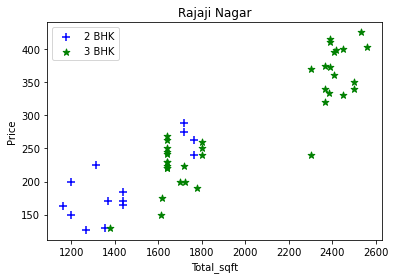

In [37]:
plot_scatter_chart(df8,'Rajaji Nagar')

In [38]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 16., 12., 13.])

In [40]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8575,other,16 BHK,10000.0,16.0,550.0,16,55000.00000
9308,other,11 BHK,6000.0,12.0,150.0,11,25000.00000
9639,other,13 BHK,5425.0,13.0,275.0,13,50691.24424


In [45]:
df8.iloc[5277]

location                 other
size                     2 BHK
total_sqft               925.0
bath                       2.0
price                     68.0
bhk                          2
price_per_sqft    73513.513514
Name: 10106, dtype: object

In [47]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300
8411,other,6 BHK,11338.0,9.0,1000.0,6,88198.976892


In [48]:
df8.iloc[1626]

location          Hosakerehalli
size                      3 BHK
total_sqft               2376.0
bath                        3.0
price                     203.0
bhk                           3
price_per_sqft     85437.710438
Name: 3356, dtype: object

In [49]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,150175.438596
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,119018.404908
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,125333.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,108333.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,119838.056680
...,...,...,...,...,...,...,...
10234,other,2 BHK,1095.0,2.0,57.0,2,52054.794521
10235,other,2 BHK,1256.0,2.0,65.0,2,51751.592357
10236,other,2 BHK,1353.0,2.0,110.0,2,81300.813008
10237,other,1 Bedroom,812.0,1.0,26.0,1,32019.704433


In [50]:
df9 = df8[df8.bath<df8.bhk+2]
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,150175.438596
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,119018.404908
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,125333.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,108333.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,119838.056680
...,...,...,...,...,...,...,...
10234,other,2 BHK,1095.0,2.0,57.0,2,52054.794521
10235,other,2 BHK,1256.0,2.0,65.0,2,51751.592357
10236,other,2 BHK,1353.0,2.0,110.0,2,81300.813008
10237,other,1 Bedroom,812.0,1.0,26.0,1,32019.704433


In [52]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [54]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df11 = pd.concat([df10,dummies],axis ='columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,other,1095.0,2.0,57.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10235,other,1256.0,2.0,65.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
X = df11.drop(['location','price'],axis = 'columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,1095.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10235,1256.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y = df11['price']
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10234     57.0
10235     65.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 5282, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [65]:
from sklearn.linear_model import LinearRegression
c = LinearRegression()
c.fit(X_train,y_train)
c.score(X_test,y_test)

0.8130507843535512

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state= 0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.8168642 , 0.86342205, 0.85521695, 0.84674275, 0.85157339])

In [116]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

3

In [79]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur', 'other'],
      dtype='object', length=223)

In [105]:
def predict (location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[loc_index] =1
    if loc_index>=0:
        
        x[loc_index]=1

    return c.predict([x])[0]



In [110]:
predict('Whitefield',1000,2,2)

51.1694734309246